In [16]:
#Declaring imports for importing modules

import pandas as pd
import numpy as np
from pprint import pprint
import os
import csv
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Current path is fetched
cur_path = os.path.dirname(os.getcwd())
print(cur_path)
file_path = cur_path + '/data/BITCOIN.csv'

/Users/palakagrawal/Desktop/Courses/MLF


In [3]:
#Reading bitcoin history data into Dataframe
bitcoin_data = pd.read_csv(file_path, encoding='latin-1')

In [4]:
bitcoin_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,28-Apr-13,135.3,135.98,132.1,134.21,-,"1,500,520,000"
1,29-Apr-13,134.44,147.49,134,144.54,-,"1,491,160,000"
2,30-Apr-13,144,146.93,134.05,139,-,"1,597,780,000"
3,1-May-13,139,139.89,107.72,116.99,-,"1,542,820,000"
4,2-May-13,116.38,125.6,92.28,105.21,-,"1,292,190,000"


In [5]:
bitcoin_data['Open'] = [x.replace(',', '') for x in bitcoin_data['Open']]
bitcoin_data['Close'] = [x.replace(',', '') for x in bitcoin_data['Close']]
bitcoin_data['High'] = [x.replace(',', '') for x in bitcoin_data['High']]
bitcoin_data['Low'] = [x.replace(',', '') for x in bitcoin_data['Low']]
bitcoin_data['Market Cap'] = [x.replace(',', '') for x in bitcoin_data['Market Cap']]

In [6]:
# It will replace empty string values to None and Numeric to 0
bitcoin_data['Volume'] = np.where(bitcoin_data['Volume'] == '-' , '0.0', bitcoin_data['Volume'])

In [7]:
bitcoin_data['Open'] = bitcoin_data['Open'].astype(float)
bitcoin_data['Close'] = bitcoin_data['Close'].astype(float)
bitcoin_data['High'] = bitcoin_data['High'].astype(float)
bitcoin_data['Low'] = bitcoin_data['Low'].astype(float)
bitcoin_data['Market Cap'] = bitcoin_data['Market Cap'].astype(float)
bitcoin_data['Volume'] = bitcoin_data['Volume'].astype(float)

In [8]:
bitcoin_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,28-Apr-13,135.30,135.98,132.10,134.21,0.0,1.500520e+09
1,29-Apr-13,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2,30-Apr-13,144.00,146.93,134.05,139.00,0.0,1.597780e+09
3,1-May-13,139.00,139.89,107.72,116.99,0.0,1.542820e+09
4,2-May-13,116.38,125.60,92.28,105.21,0.0,1.292190e+09


In [9]:
#Checking for null values
bitcoin_data.isnull().any()

Date          False
Open          False
High          False
Low           False
Close         False
Volume         True
Market Cap    False
dtype: bool

In [10]:
bitcoin_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,28-Apr-13,135.30,135.98,132.10,134.21,0.0,1.500520e+09
1,29-Apr-13,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2,30-Apr-13,144.00,146.93,134.05,139.00,0.0,1.597780e+09
3,1-May-13,139.00,139.89,107.72,116.99,0.0,1.542820e+09
4,2-May-13,116.38,125.60,92.28,105.21,0.0,1.292190e+09


In [11]:
bitcoin_data.describe(include='all')

,Date,Open,High,Low,Close,Volume,Market Cap
count,1733,1733.000000,1733.000000,1733.000000,1733.000000,1.732000e+03,1.733000e+03
unique,1733,NaN,NaN,NaN,NaN,NaN,NaN
top,14-Sep-17,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1352.229919,1403.775920,1298.221483,1358.558621,7.394792e+08,2.165153e+10
std,NaN,2784.628270,2920.822653,2622.922293,2794.518721,2.640802e+09,4.686601e+10
min,NaN,68.510000,74.560000,65.530000,68.430000,0.000000e+00,7.792550e+08
25%,NaN,272.290000,277.850000,265.200000,273.090000,1.600240e+07,3.859270e+09
50%,NaN,474.860000,483.020000,456.390000,474.880000,4.156540e+07,6.755220e+09
75%,NaN,828.610000,854.640000,806.050000,829.450000,1.217618e+08,1.194920e+10


In [12]:
#show dataset info
print(bitcoin_data.describe())

               Open          High           Low         Close        Volume  \
count   1733.000000   1733.000000   1733.000000   1733.000000  1.732000e+03   
mean    1352.229919   1403.775920   1298.221483   1358.558621  7.394792e+08   
std     2784.628270   2920.822653   2622.922293   2794.518721  2.640802e+09   
min       68.510000     74.560000     65.530000     68.430000  0.000000e+00   
25%      272.290000    277.850000    265.200000    273.090000  1.600240e+07   
50%      474.860000    483.020000    456.390000    474.880000  4.156540e+07   
75%      828.610000    854.640000    806.050000    829.450000  1.217618e+08   
max    19475.800000  20089.000000  18974.100000  19497.400000  2.384090e+10   

         Market Cap  
count  1.733000e+03  
mean   2.165153e+10  
std    4.686601e+10  
min    7.792550e+08  
25%    3.859270e+09  
50%    6.755220e+09  
75%    1.194920e+10  
max    3.261410e+11  


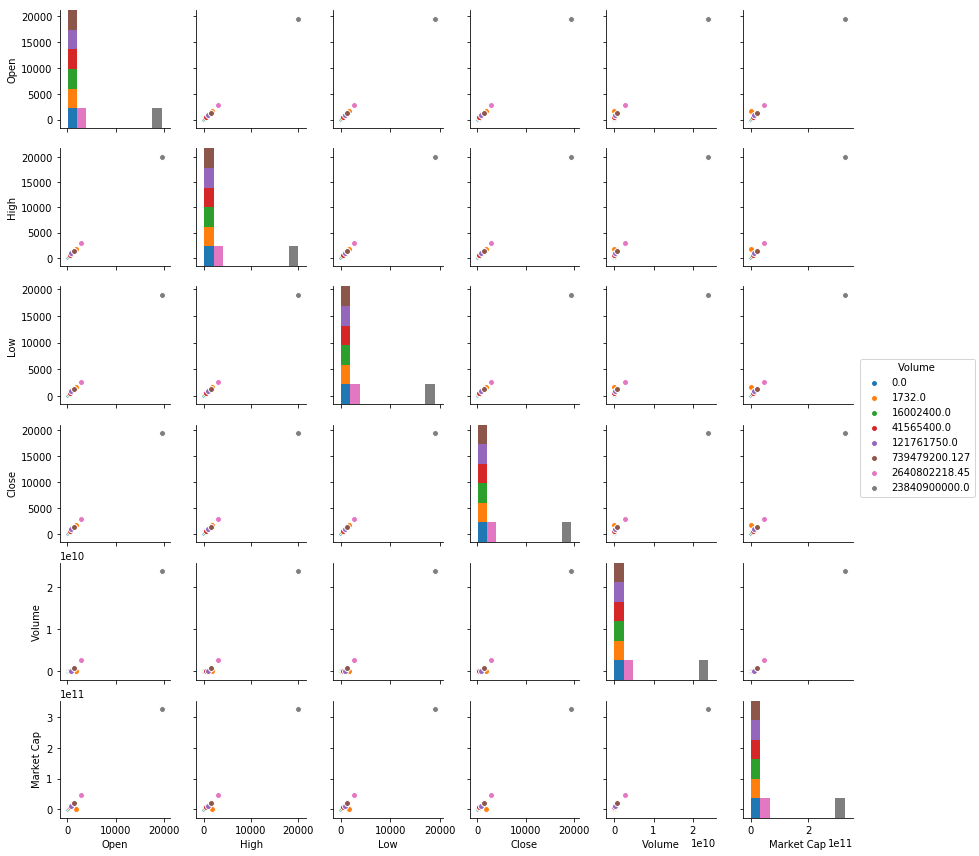

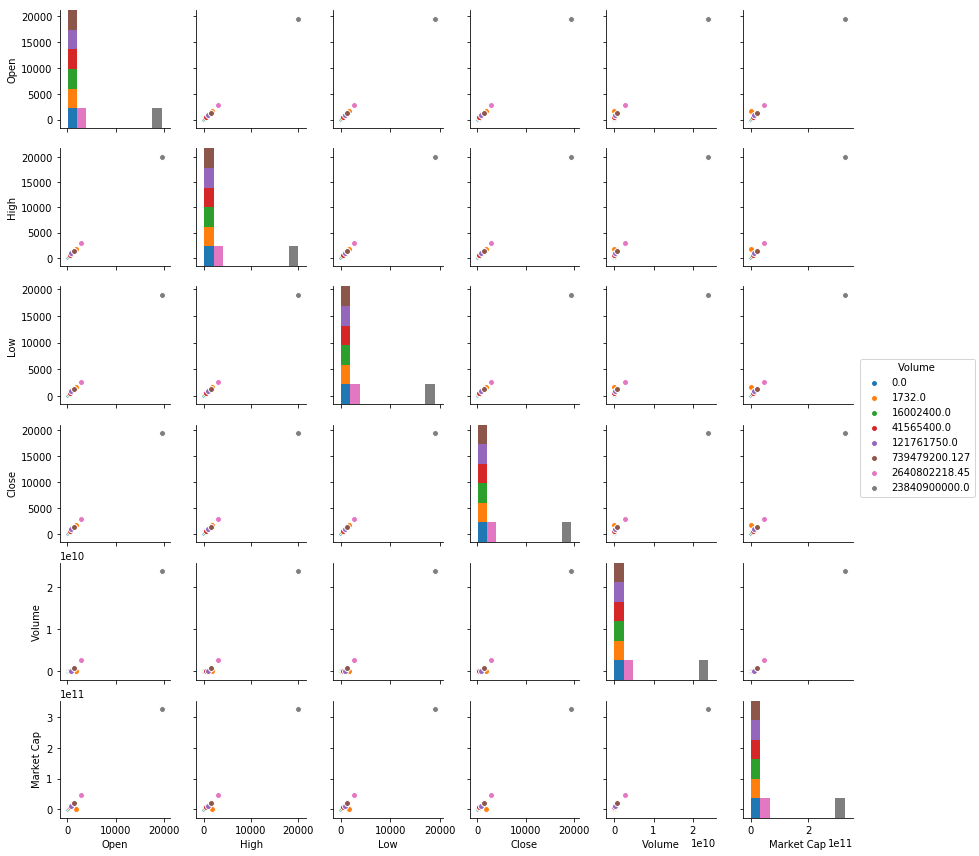

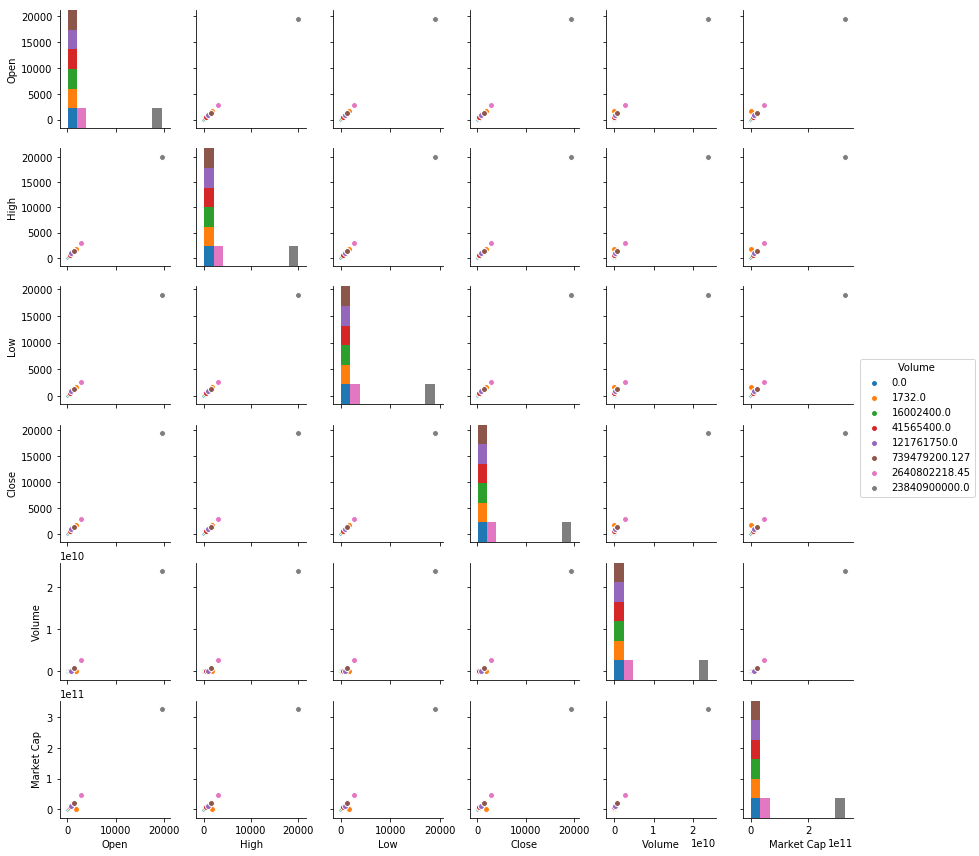

In [18]:
#Plotting pairplot
sns.pairplot(bitcoin_data.describe(),hue='Volume',size=2)
plt.savefig(cur_path+'/PairPlot.jpg',bbox_inches="tight")
plt.show()